In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader

from torchvision.models import resnet18, vgg13_bn

from models.classification import Classificator
from datasets.classification import ImageDataset, imagenet_mini

from torchvision import transforms as T

# import config
from utils import plot

from train import train, val

In [2]:
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
BATCH_SIZE = 16
LEARNING_RATE = 1e-4
NUM_WORKERS = 16
NUM_EPOCHS = 100

train_transform = T.Compose(
    [
        T.ToTensor(),
        T.Resize(size=(256, 256)),
        T.RandomHorizontalFlip(p=0.5),
        T.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    ]
)

val_transform = T.Compose(
    [
        T.ToTensor(),
        T.Resize(size=(256, 256)),
        T.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    ]
)

In [3]:
# model = Classificator(feature_layers=4, feature_scale=16, n_hidden=2048, dropout=0.5).to(DEVICE)
cf = Classificator(
    in_channels=512, feature_layers=0, n_hidden=4096, in_size=(7, 7), dropout=0.5
).to(DEVICE)
model = vgg13_bn(pretrained=True)
for param in model.parameters():
    param.require_grad = False
model.classifier = cf.mlp

# num_features = model.classifier[6].in_features
# features = list(model.classifier.children())[:-1] # Remove last layer
# features.extend([nn.Linear(num_features, 1000)]) # Add our layer with 4 outputs
# model.classifier = nn.Sequential(*features)

model = model.to(DEVICE)

opt = optim.Adam(
    model.parameters(),
    lr=LEARNING_RATE,
    # betas=(0.5, 0.999),
)
# opt = optim.RMSprop(
#     model.parameters(),
#     lr=LEARNING_RATE,
# )
# opt = optim.SGD(
#     model.parameters(),
#     lr=LEARNING_RATE,
#     momentum=0.9,
#     weight_decay=1e-4
# )

criterion = nn.CrossEntropyLoss().to(DEVICE)

In [4]:
dataset_train = ImageDataset(
    root=imagenet_mini.train_root,
    transform=train_transform,
)
dataset_val = ImageDataset(
    root=imagenet_mini.val_root,
    transform=val_transform,
)

dataloader_train = DataLoader(
    dataset_train,
    batch_size=BATCH_SIZE,
    shuffle=True,
    num_workers=NUM_WORKERS,
    pin_memory=True,
)
dataloader_val = DataLoader(
    dataset_val,
    batch_size=BATCH_SIZE,
    shuffle=True,
    num_workers=NUM_WORKERS,
    pin_memory=True,
)

Epoch [1/100]:   0%|          | 0/2172 [00:00<?, ?it/s]

Epoch [1/100]:   0%|          | 0/246 [00:00<?, ?it/s]

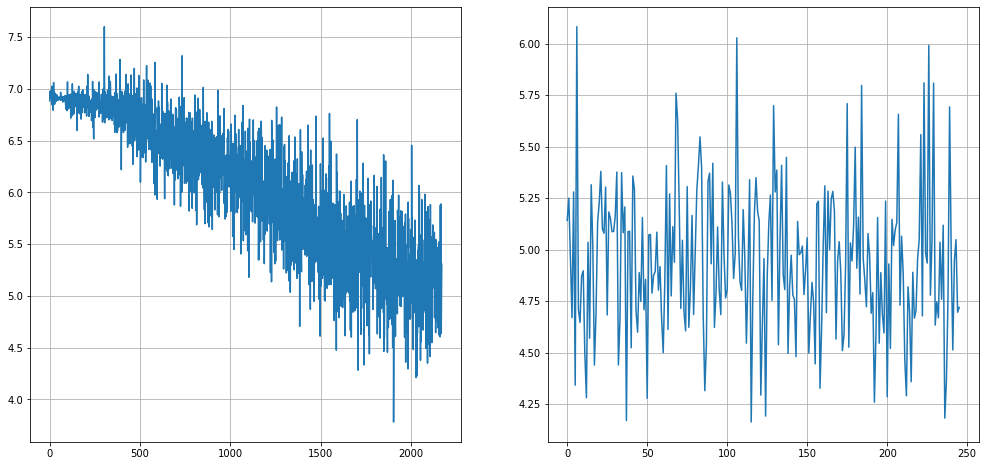

Epoch [2/100]:   0%|          | 0/2172 [00:00<?, ?it/s]

Epoch [2/100]:   0%|          | 0/246 [00:00<?, ?it/s]

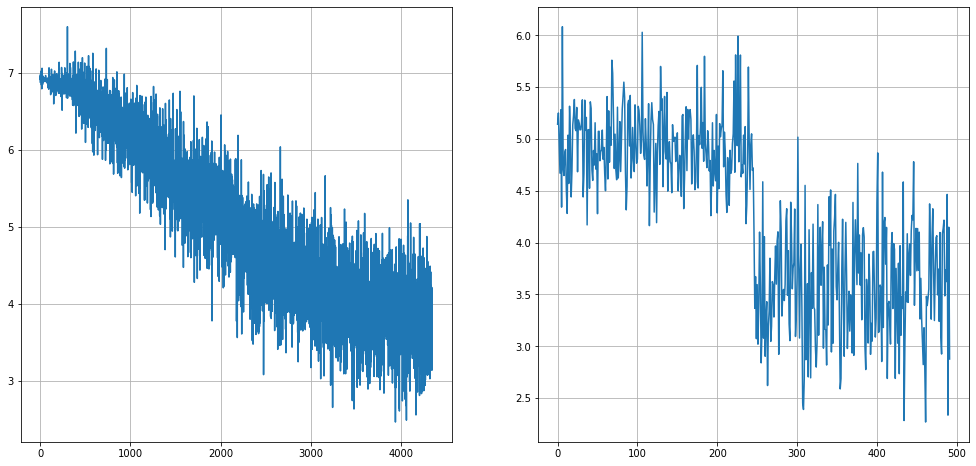

Epoch [3/100]:   0%|          | 0/2172 [00:00<?, ?it/s]

Epoch [3/100]:   0%|          | 0/246 [00:00<?, ?it/s]

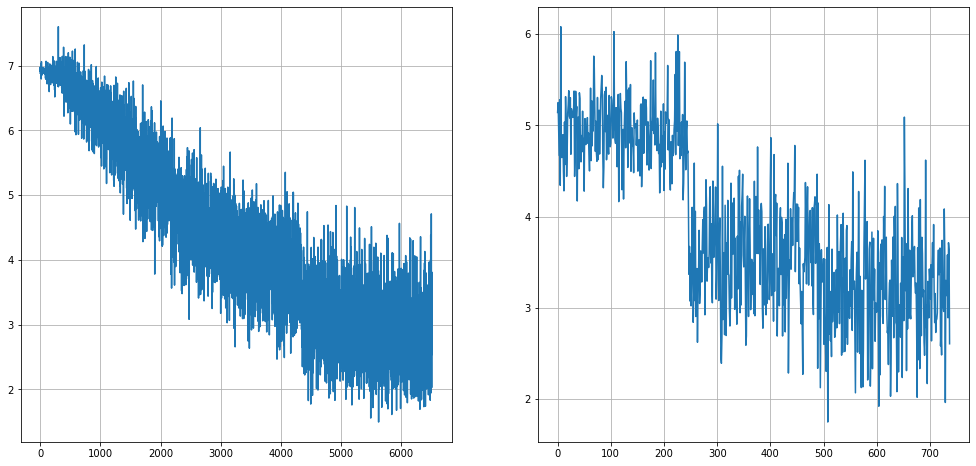

Epoch [4/100]:   0%|          | 0/2172 [00:00<?, ?it/s]

Epoch [4/100]:   0%|          | 0/246 [00:00<?, ?it/s]

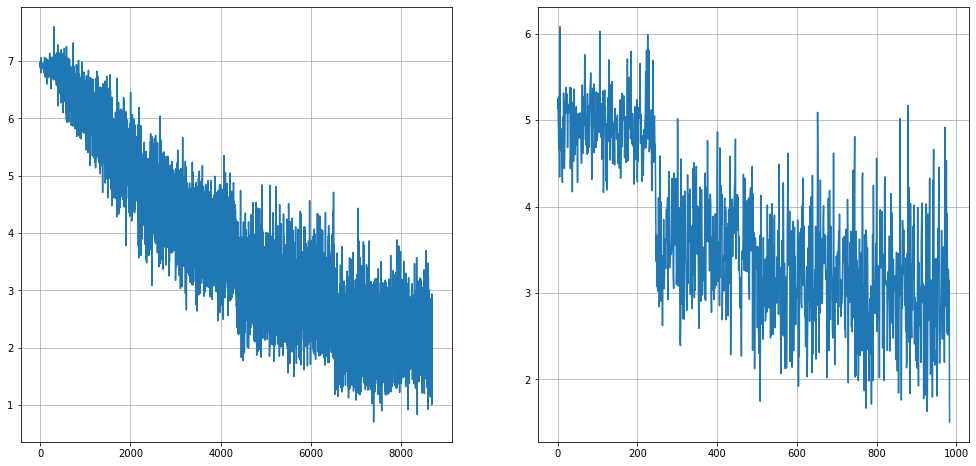

Epoch [5/100]:   0%|          | 0/2172 [00:00<?, ?it/s]

Epoch [5/100]:   0%|          | 0/246 [00:00<?, ?it/s]

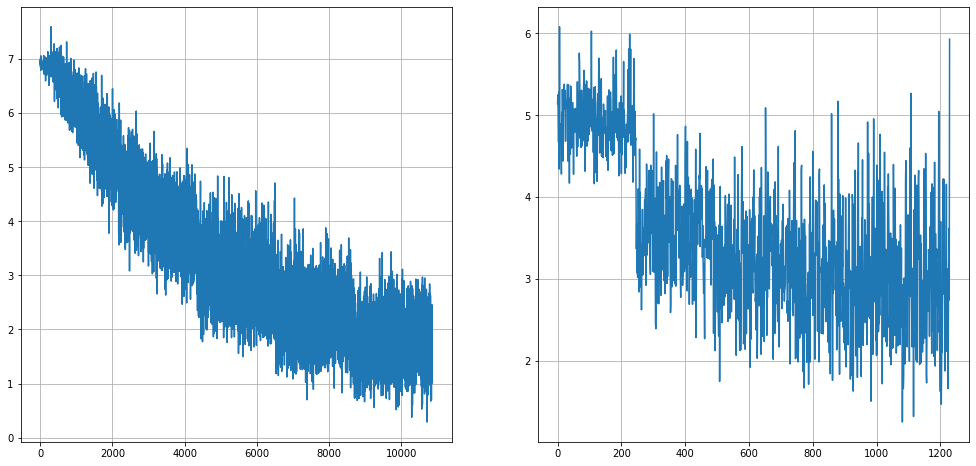

Epoch [6/100]:   0%|          | 0/2172 [00:00<?, ?it/s]

Epoch [6/100]:   0%|          | 0/246 [00:00<?, ?it/s]

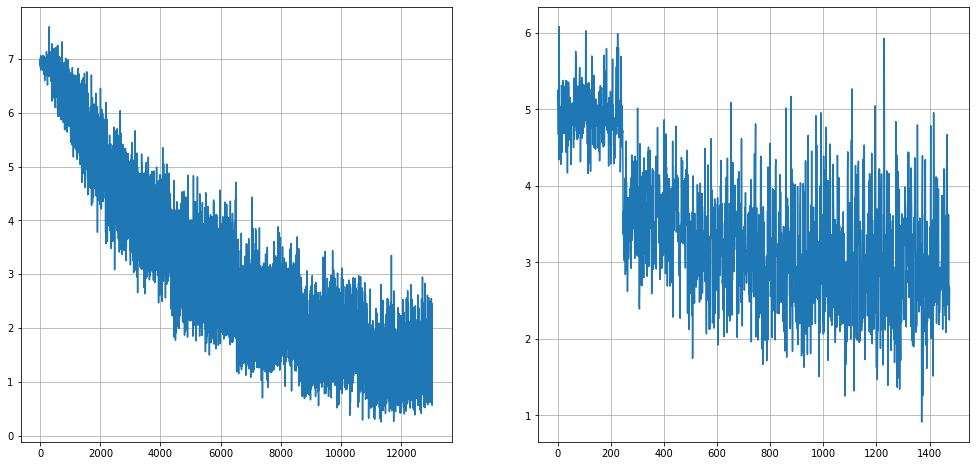

Epoch [7/100]:   0%|          | 0/2172 [00:00<?, ?it/s]

Epoch [7/100]:   0%|          | 0/246 [00:00<?, ?it/s]

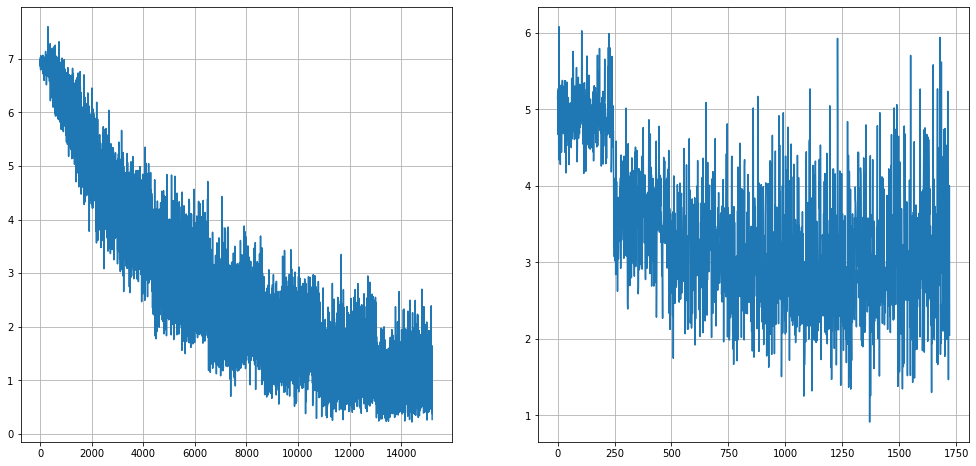

Epoch [8/100]:   0%|          | 0/2172 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [5]:
train_loss_history = []
val_loss_history = []
for epoch in range(NUM_EPOCHS):
    train_losses = train(
        epoch, model, dataloader_train, opt, criterion, dataset_train.labels
    )
    train_loss_history.extend(train_losses)

    val_losses = val(epoch, model, dataloader_val, criterion, dataset_train.labels)
    val_loss_history.extend(val_losses)

    plot(train_loss_history, val_loss_history)

In [6]:
from utils import save_checkpoint

In [8]:
save_checkpoint(model, opt, "classifier40.pth")

=> Saving checkpoint
